In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [25.07109142526279,
  23.33775410573768,
  21.32804736712619,
  27.541286368696856,
  27.686694928920513,
  23.804071111293574,
  20.136005529750665,
  28.89510071366057,
  25.464379658676783,
  24.529263803227664,
  19.27660868474465,
  25.957958986855154,
  20.449686771017767,
  21.593873624411174,
  26.092216543559488,
  25.913447032723973,
  23.957776429206206,
  20.223523893252434,
  25.789750458811604,
  20.6684587334908,
  23.737025346349135,
  21.5018765384309,
  24.2856468579284,
  27.529775935649894,
  20.491453966821688,
  25.311504316751396,
  27.585414476260397,
  28.003298631503064,
  24.96035125552353,
  25.984251072170547,
  22.657533138948114,
  26.130659811390554,
  24.668244578173304,
  20.920446316508677,
  21.85327729526456,
  31.142325417357526,
  23.949482587126973,
  27.350762898794294,
  25.071317904325888,
  25.74811567118215,
  28.59836153568334,
  24.076174264071184,
  28.133258536614957,
  20.6762163721537,
  24.457326594251306,
  25.69493414029396,
 

In [2]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,25.071091,52.903583,167.652045,-61.399646,425.507922
1,23.337754,57.096762,181.939806,-62.312855,438.041370
2,21.328047,48.463321,148.128085,-51.611124,376.038828
3,27.541286,51.458913,154.595387,-62.120215,413.620249
4,27.686695,45.060274,136.342175,-41.771303,346.677195
...,...,...,...,...,...
99995,25.771618,51.378952,159.849913,-42.999166,379.754814
99996,25.218812,50.262052,155.112156,-41.248687,359.469334
99997,24.175021,46.080288,135.542781,-39.339940,331.624257
99998,28.770470,47.916970,140.488676,-46.125463,351.576681


<AxesSubplot:xlabel='Q', ylabel='Z'>

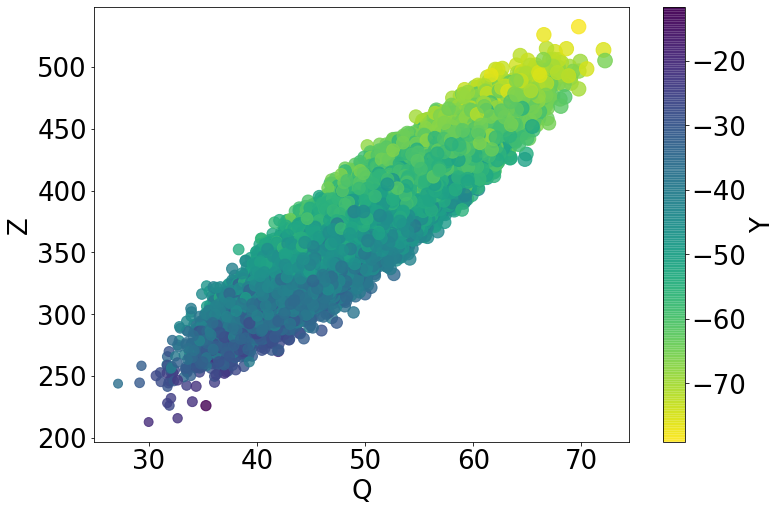

In [3]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "Q", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [4]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,-0.003214,-0.004856,-0.000416,0.137930
Q,-0.003214,1.000000,0.948548,-0.702954,0.913614
X,-0.004856,0.948548,1.000000,-0.667724,0.933747
Y,-0.000416,-0.702954,-0.667724,1.000000,-0.844487
Z,0.137930,0.913614,0.933747,-0.844487,1.000000


In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df[X_vars]
    # Initial estimate should include constant
    #   This won't be the case we regress the errors
    X["Constant"] = 1
    # pass y_var as list for consistent structure
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

In [6]:
residuals

,P,Q,X,Y,Z
0,-0.232925,-2.937233,2.248335,-1.249316,1.112631
1,0.704565,-2.726816,6.111086,-3.494151,-6.127400
2,-3.825257,-1.162842,-2.836066,2.559977,7.965482
3,0.671120,-0.881405,-1.042942,-1.167233,2.407262
4,0.551160,-0.478821,-1.107351,1.968970,3.221879
...,...,...,...,...,...
99995,-0.201188,-0.692400,0.660595,2.668732,2.442158
99996,1.651271,-0.355590,4.182950,-0.634006,-6.136551
99997,-0.725660,0.983106,-1.402715,1.863447,1.251890
99998,4.121595,0.856939,3.143115,-3.213219,-8.971497


In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.89
Z,0.71,0.00,0.83,-0.89,1.00


In [8]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.89
Z,0.71,0.00,0.83,-0.89,1.00


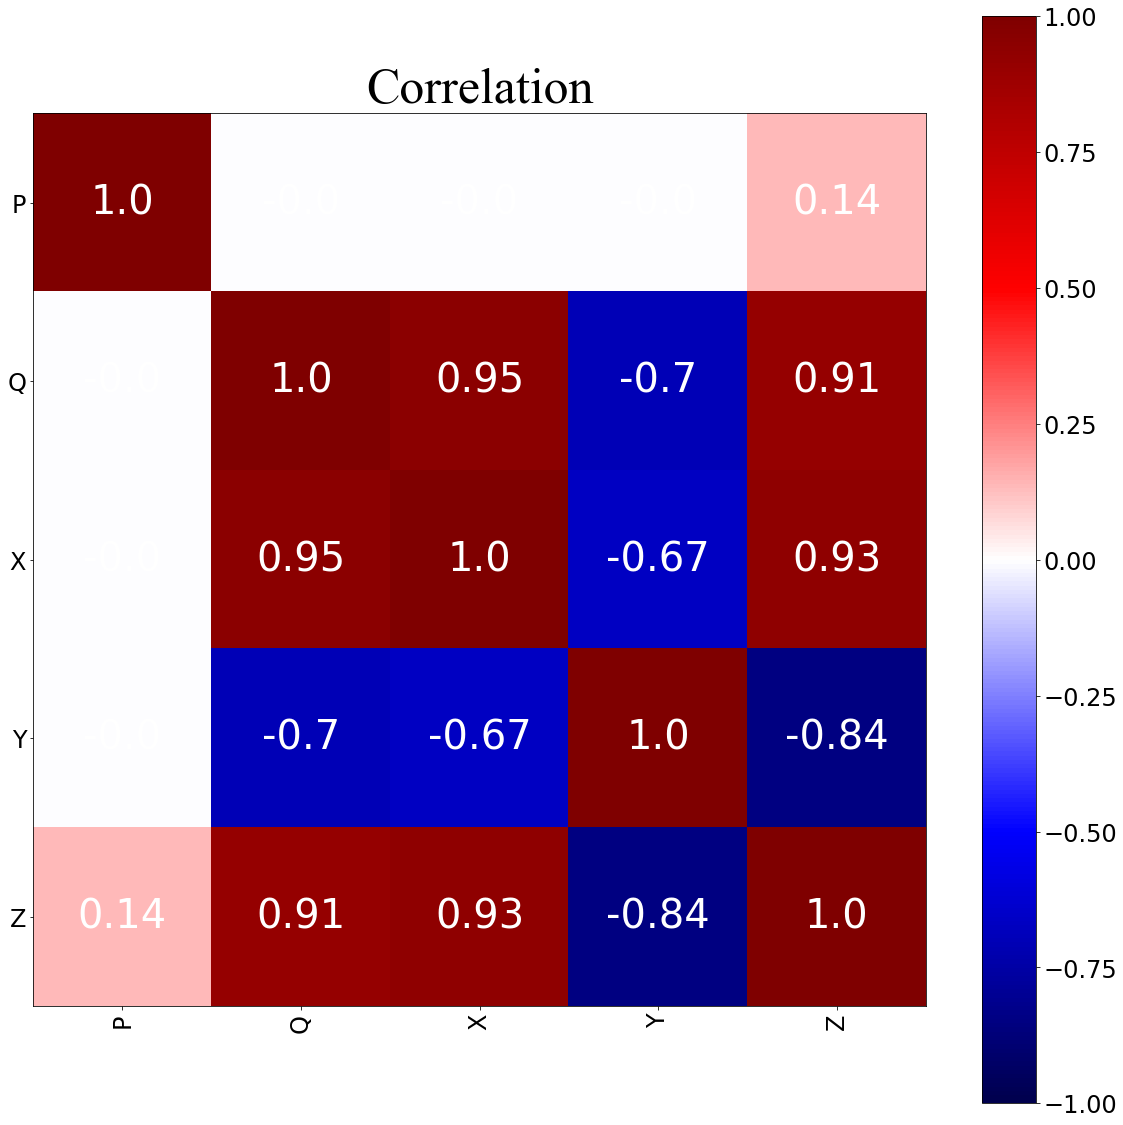

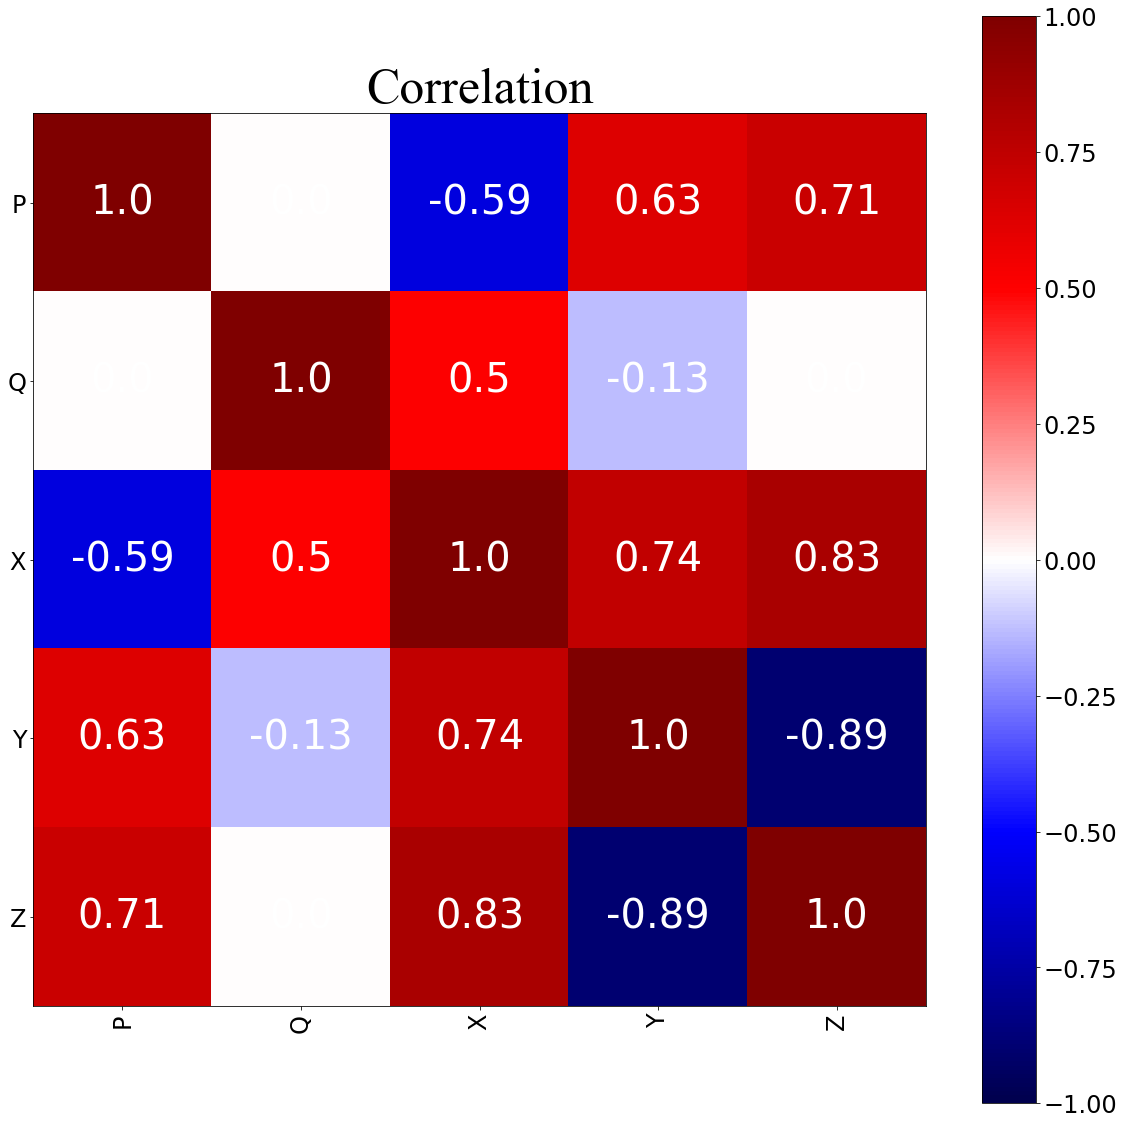

In [12]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(), save_fig = False, pp = None)
corr_matrix_heatmap(df.pcorr(), save_fig = False, pp = None)

In [13]:
residuals

,P,Q,X,Y,Z
0,-0.232925,-2.937233,2.248335,-1.249316,1.112631
1,0.704565,-2.726816,6.111086,-3.494151,-6.127400
2,-3.825257,-1.162842,-2.836066,2.559977,7.965482
3,0.671120,-0.881405,-1.042942,-1.167233,2.407262
4,0.551160,-0.478821,-1.107351,1.968970,3.221879
...,...,...,...,...,...
99995,-0.201188,-0.692400,0.660595,2.668732,2.442158
99996,1.651271,-0.355590,4.182950,-0.634006,-6.136551
99997,-0.725660,0.983106,-1.402715,1.863447,1.251890
99998,4.121595,0.856939,3.143115,-3.213219,-8.971497


In [14]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

,P,Q,X,Y,Z
P,NaN,0.58,0.0,0.0,0.00
Q,0.58,NaN,0.0,0.0,0.84
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.84,0.0,0.0,NaN


In [15]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [17]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used):
        c_used = copy.copy(controls_used)
        for c_var in control_vars:
            if y not in undirected_graph[x]:
                break
            c_used.append(c_var)
            test = df.partial_corr(x = x, y = y, covar=c_used,
                                  method = "pearson")
            if test["p-val"].values[0] > p_val:
                undirected_graph[x].remove(y)
                break
            else:
                remaining_controls = copy.copy(control_vars)
                remaining_controls.remove(c_var)
                check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
        d_sep = {}
        for x in df.keys():
            ys = undirected_graph[x]
            for y in df.keys():
                d_sep[(x,y)] = []
                if x != y:
                    test = df.partial_corr(x = x, y = y, covar = None, method = "pearson")
                    if test["p-val"].values[0] > p_val:
                        undirected_graph[x].remove(y)
                    else:
                         control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    plt.axis("off")
    plt.savefig("g1.png", format="PNG")
    plt.show()

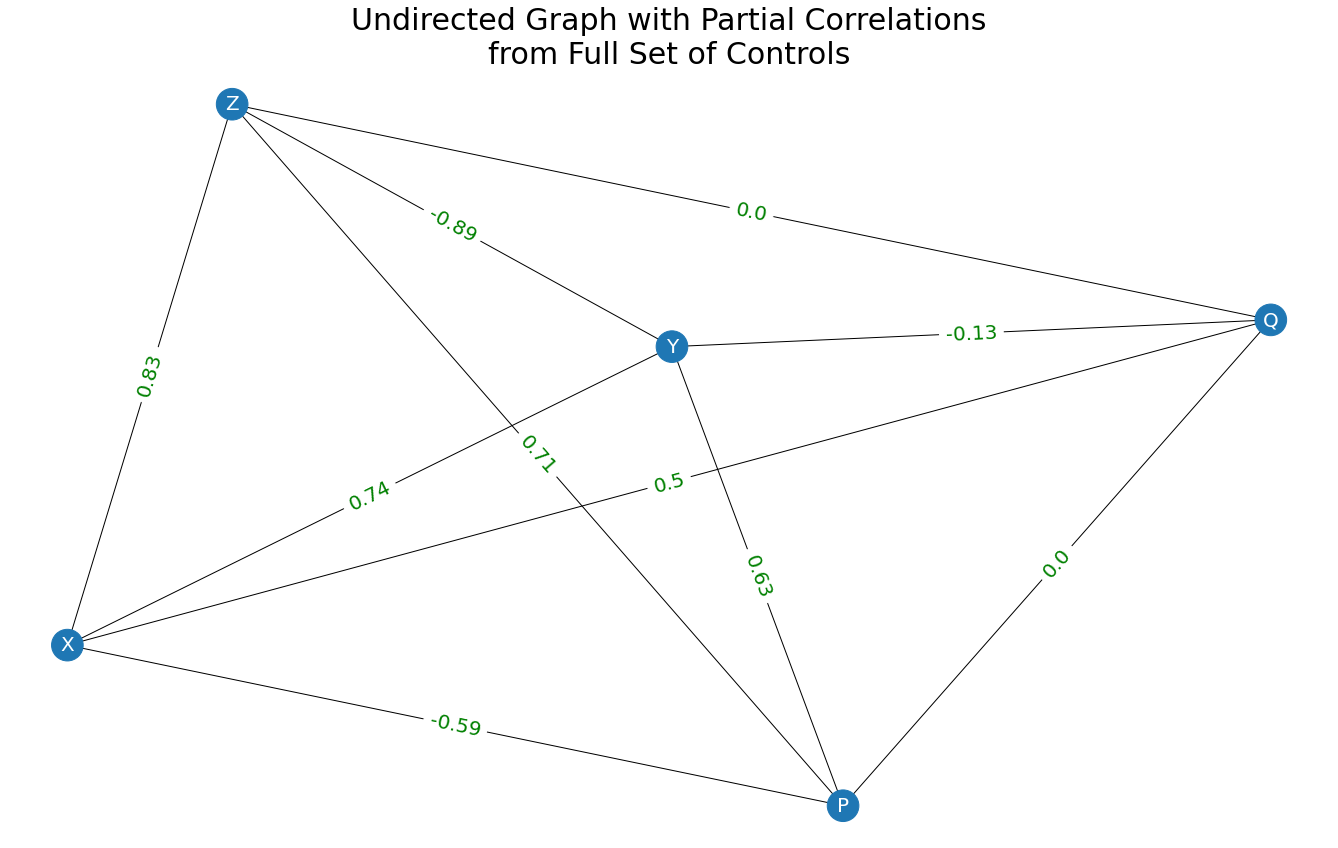

In [19]:
graph_DAG(undirected_graph, df, title = "Undirected Graph with Partial Correlations\nfrom Full Set of Controls")